In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('train.tsv', sep='\t')
test = pd.read_csv('test.tsv', sep='\t')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
train_id             1482535 non-null int64
name                 1482535 non-null object
item_condition_id    1482535 non-null int64
category_name        1476208 non-null object
brand_name           849853 non-null object
price                1482535 non-null float64
shipping             1482535 non-null int64
item_description     1482531 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


In [4]:
train.isnull().any()

train_id             False
name                 False
item_condition_id    False
category_name         True
brand_name            True
price                False
shipping             False
item_description      True
dtype: bool

In [5]:
def fill_missing_data(data):
    data.category_name.fillna(value = "Other/Other/Other", inplace = True)
    data.brand_name.fillna(value = "Unknown", inplace = True)
    data.item_description.fillna(value = "No description yet", inplace = True)
    return data

train = fill_missing_data(train)

In [6]:
train.describe()

,train_id,item_condition_id,price,shipping
count,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06
mean,7.412670e+05,1.907380e+00,2.673752e+01,4.472744e-01
std,4.279711e+05,9.031586e-01,3.858607e+01,4.972124e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.706335e+05,1.000000e+00,1.000000e+01,0.000000e+00
50%,7.412670e+05,2.000000e+00,1.700000e+01,0.000000e+00
75%,1.111900e+06,3.000000e+00,2.900000e+01,1.000000e+00
max,1.482534e+06,5.000000e+00,2.009000e+03,1.000000e+00


In [7]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,Unknown,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,Unknown,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,Unknown,44.0,0,Complete with certificate of authenticity


In [8]:
train.price.describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

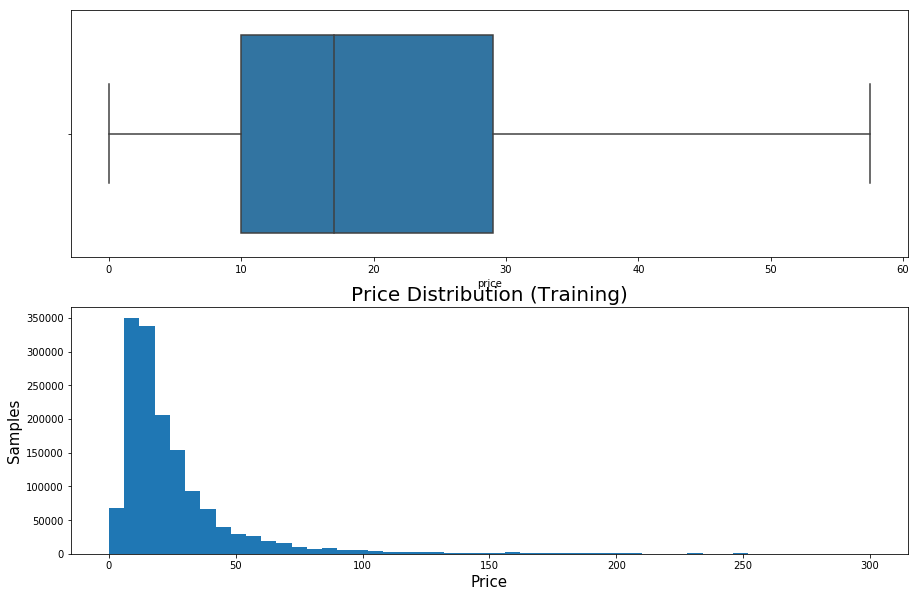

In [9]:
fig, ax = plt.subplots(2, 1, figsize = (15, 10))
sns.boxplot(train.price, showfliers = False, ax = ax[0])
ax[1].hist(train.price, bins = 50, range = [0, 300], label = "price")
ax[1].set_title("Price Distribution (Training)", fontsize = 20)
ax[1].set_xlabel("Price", fontsize = 15)
ax[1].set_ylabel("Samples", fontsize = 15)
plt.show()

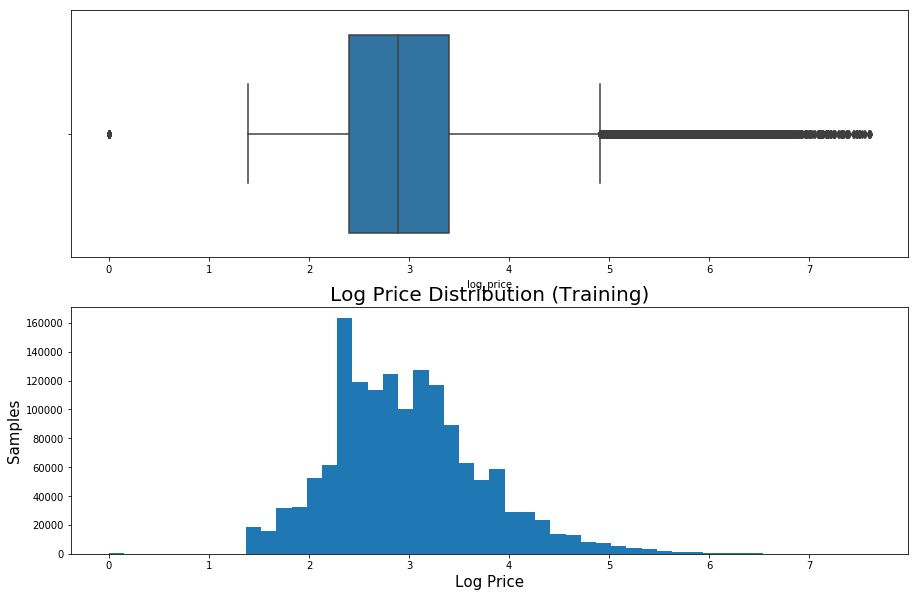

In [10]:
train["log_price"] = np.log(train["price"] + 1)
fig, ax = plt.subplots(2, 1, figsize = (15, 10))
sns.boxplot(train.log_price, ax = ax[0])
ax[1].hist(train.log_price, bins = 50)
ax[1].set_title("Log Price Distribution (Training)", fontsize = 20)
ax[1].set_xlabel("Log Price", fontsize = 15)
ax[1].set_ylabel("Samples", fontsize = 15)
plt.show()

In [11]:
print("price0は", train[train["price"] == 0].price.size, "個")

price0は 874 個


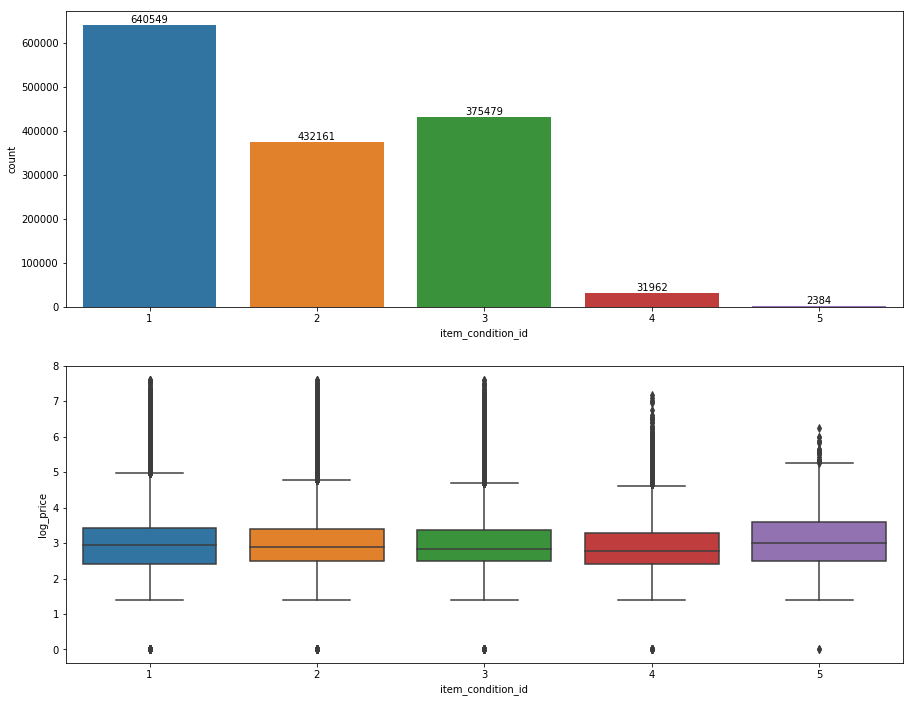

In [12]:
fig, ax = plt.subplots(2, 1, figsize = (15, 12))
sns.countplot(train.item_condition_id, ax = ax[0])
rects = ax[0].patches
labels = train.item_condition_id.value_counts().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax[0].text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = "center", va = "bottom")
sns.boxplot(x = train.item_condition_id, y = train.log_price, orient = "v", ax = ax[1])
plt.show()

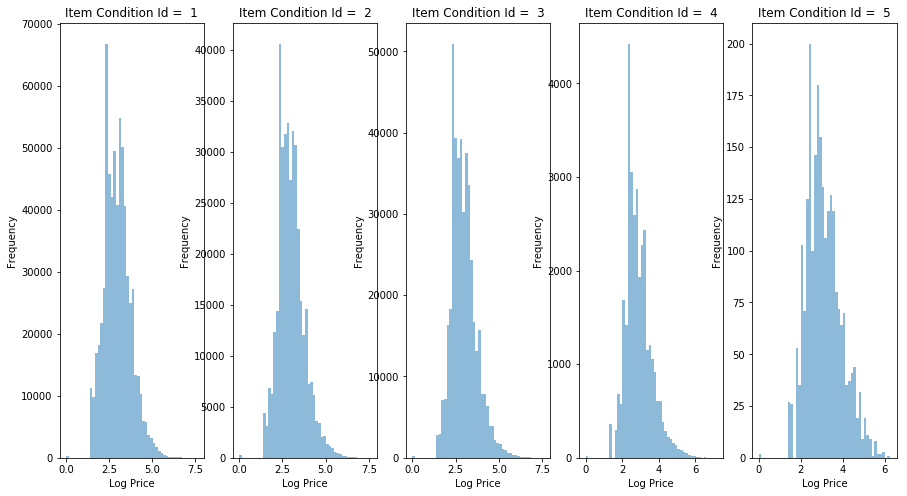

In [13]:
fog, ax = plt.subplots(1, 5, figsize = (15, 8))
for i in range(1, 6):
    train[train.item_condition_id == i].log_price.plot.hist(ax = ax[i-1], bins = 50, alpha = 0.5)  
    ax[i-1].set_xlabel("Log Price")
    ax[i-1].set_title("Item Condition Id = " + " " + str(i))
plt.show()

In [14]:
train.groupby(["item_condition_id"]).price.std()

item_condition_id
1    35.418024
2    42.125698
3    40.030681
4    35.679148
5    39.531069
Name: price, dtype: float64

In [15]:
train.groupby(["item_condition_id"]).price.mean()

item_condition_id
1    26.486967
2    27.563225
3    26.540711
4    24.349212
5    31.703859
Name: price, dtype: float64

In [16]:
train.groupby(["item_condition_id"]).price.median()

item_condition_id
1    18.0
2    17.0
3    16.0
4    15.0
5    19.0
Name: price, dtype: float64

In [17]:
train.shipping.value_counts()

0    819435
1    663100
Name: shipping, dtype: int64

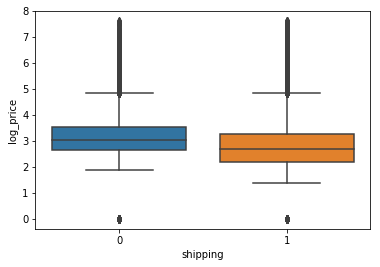

In [18]:
sns.boxplot(x = train.shipping, y = train.log_price, orient = "v")

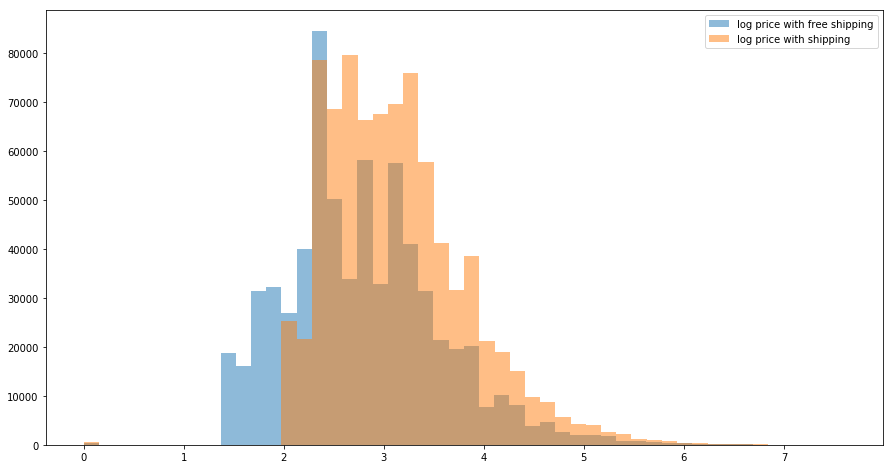

In [19]:
plt.figure(figsize = (15, 8))
plt.hist(train[train.shipping == 1].log_price, bins = 50, alpha = 0.5, label = "log price with free shipping")
plt.hist(train[train.shipping == 0].log_price, bins = 50, alpha = 0.5, label = "log price with shipping")
plt.legend(fontsize = 10)
plt.show()

In [20]:
brands = train["brand_name"].value_counts()
print("There are", brands.size, "unique known brands.")

There are 4810 unique known brands.


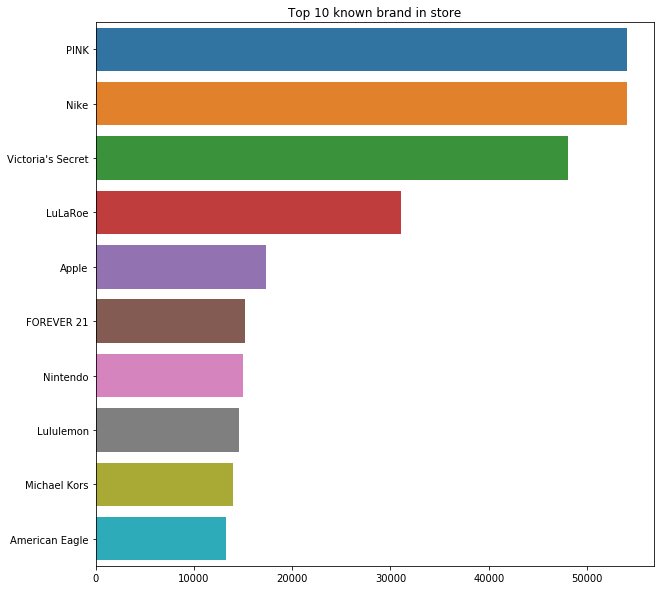

In [21]:
plt.figure(figsize = (10, 10))
sns.barplot(brands[1:11].values, brands[1:11].index)
plt.title("Top 10 known brand in store")
plt.show()

In [22]:
brand_std_price = train.groupby(["brand_name"], as_index = True).price.std().sort_values(ascending = False)
print("std price by brands", brand_std_price[:10])
brand_mean_price = train.groupby(["brand_name"], as_index = True).price.mean().sort_values(ascending = False)
print("mean price by brands", brand_mean_price[:10])
brand_median_price = train.groupby(["brand_name"]).price.median().sort_values(ascending = False)
print("median price by brands", brand_median_price[:10])


std price by brands brand_name
Demdaco               592.555483
Proenza Schouler      420.369183
MCM Worldwide         351.470773
Saint Laurent         339.769830
Celine                339.356795
Louis Vuitton         247.801644
Goyard                242.051339
Sanyo                 226.328216
MICHELE               224.704134
Valentino Garavani    222.253909
Name: price, dtype: float64
mean price by brands brand_name
Demdaco             429.000000
Proenza Schouler    413.250000
Auto Meter          344.000000
Oris                300.000000
MCM Worldwide       289.173913
Longines            254.000000
Vitamix             253.111111
Blendtec            251.800000
David Yurman        248.611570
Celine              238.780822
Name: price, dtype: float64
median price by brands brand_name
Demdaco                429.0
Auto Meter             344.0
Proenza Schouler       315.5
Oris                   300.0
Longines               254.0
Blendtec               250.0
Dainese                230.0
Fréd

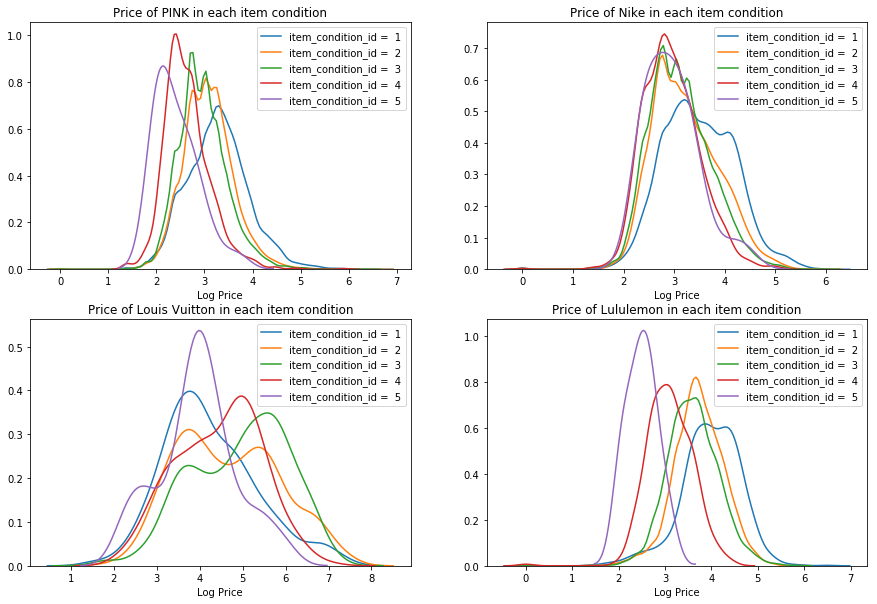

In [23]:
brands = ["PINK", "Nike", "Louis Vuitton", "Lululemon"]
nbrand = len(brands)

fig, ax = plt.subplots(2, 2, figsize = (15, 10))
for b in range(nbrand):
    brand = brands[b]
    for i in range(1, 6):
        sns.distplot(train[train.brand_name == brand][train["item_condition_id"] == i].log_price, hist = False,
                     label = "item_condition_id = " + " " + str(i), ax = ax[int(b/2)][b%2])
    ax[int(b/2)][b%2].set_xlabel("Log Price")
    ax[int(b/2)][b%2].set_title("Price of " + brand + " in each item condition")
plt.show()

In [24]:
train[train["brand_name"] == "Unknown"].price.describe()

count    632682.000000
mean         21.133453
std          27.361260
min           0.000000
25%           9.000000
50%          14.000000
75%          24.000000
max        2000.000000
Name: price, dtype: float64

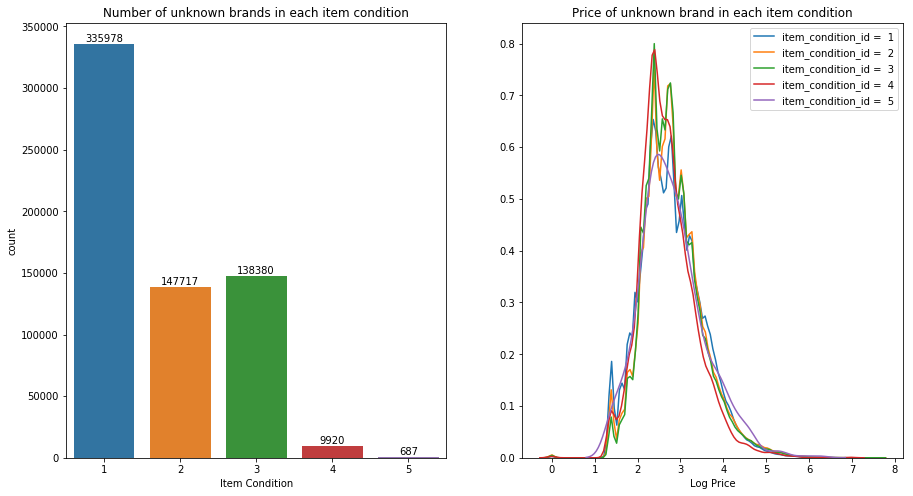

In [25]:
fig, ax = plt.subplots(1, 2, figsize = (15, 8))
sns.countplot(train[train.brand_name == "Unknown"].item_condition_id, ax = ax[0])
ax[0].set_xlabel("Item Condition")
ax[0].set_title("Number of unknown brands in each item condition")
rects = ax[0].patches
labels = train[train.brand_name == "Unknown"].item_condition_id.value_counts().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax[0].text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = "center", va = "bottom")
for i in range(1, 6):
    sns.distplot(train[train.brand_name == "Unknown"][train["item_condition_id"] == i].log_price, hist = False,
                 label = "item_condition_id = " + " " + str(i), ax = ax[1])
ax[1].set_xlabel("Log Price")
ax[1].set_title("Price of unknown brand in each item condition")
plt.show()

In [26]:
free_item = train[train.price == 0].brand_name
print(free_item.unique().size, "brands have free items")

237 brands have free items


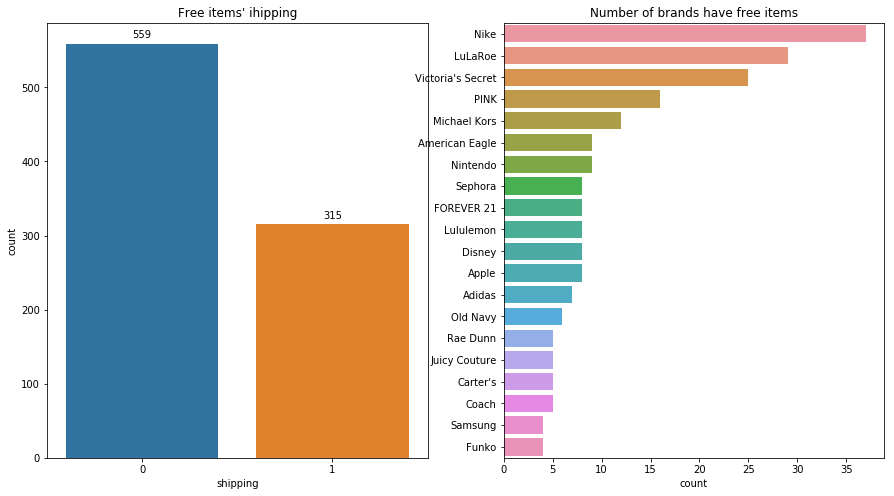

In [27]:
known_free_item = free_item.value_counts()[1:21]
fig, ax = plt.subplots(1, 2, figsize = (15, 8))
sns.countplot(train[train.price == 0].shipping, ax = ax[0])
rects = ax[0].patches
labels = train[train.price == 0].shipping.value_counts().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax[0].text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = "center", va = "bottom")
ax[0].set_title("Free items' ihipping")
sns.barplot(known_free_item.values, known_free_item.index, ax = ax[1])
ax[1].set_xlabel("count")
ax[1].set_title("Number of brands have free items")
plt.show()

In [28]:
train["main_cat"] = train.category_name.str.extract("([^/]+)/[^/]+/[^/]+")
train["subcat1"] = train.category_name.str.extract("[^/]+/([^/]+)/[^/]+")
train["subcat2"] = train.category_name.str.extract("[^/]+/[^/]+/([^/]+)")

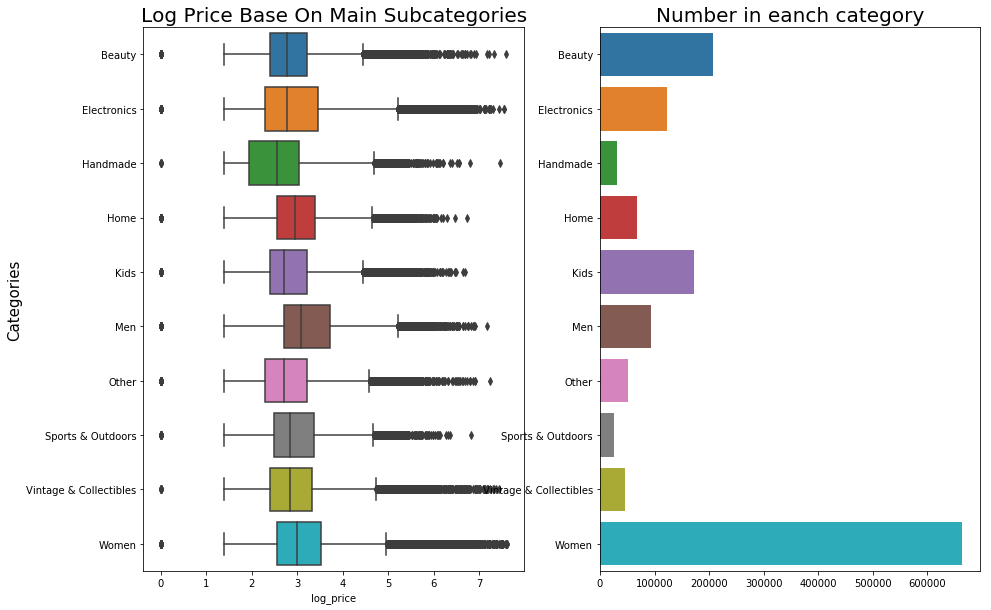

In [29]:
category = train.main_cat
order = sorted(category.unique())
fig, ax = plt.subplots(1, 2, figsize = (15, 10))
sns.boxplot(x = train.log_price, y = category, orient = "h", order = order, ax = ax[0])
ax[0].set_title("Log Price Base On Main Subcategories", fontsize = 20)
ax[0].set_ylabel("Categories", fontsize = 15)
sns.barplot(category.value_counts().values, category.value_counts().index, order = order, ax = ax[1])
ax[1].set_title("Number in eanch category", fontsize = 20)
plt.show()

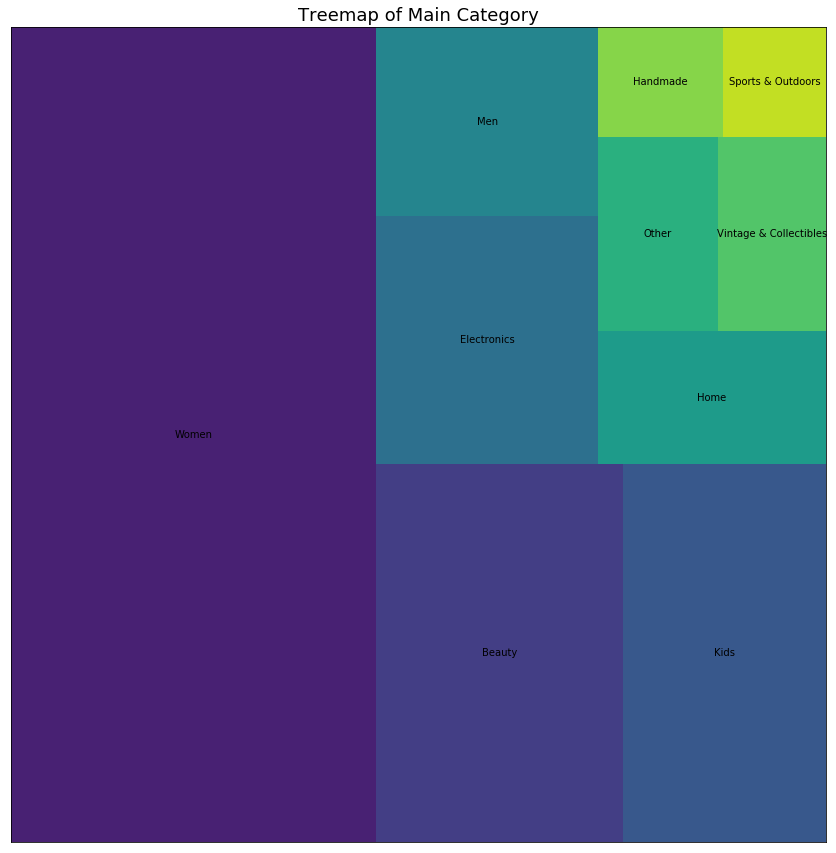

In [30]:
import squarify

fig = plt.figure(figsize = (8, 8))
regions = train.main_cat.value_counts().to_frame()
ax = fig.add_subplot(111, aspect = "equal")
ax = squarify.plot(sizes = regions["main_cat"].values, label = regions.index,
              color = sns.color_palette("viridis", 10), alpha = 1)
ax.set_xticks([])
ax.set_yticks([])
fig = plt.gcf()
fig.set_size_inches(20, 15)
plt.title("Treemap of Main Category", fontsize = 18)
plt.show()

In [31]:
print("There are", len(train.subcat1.unique()), "second categories.")

There are 113 second categories.


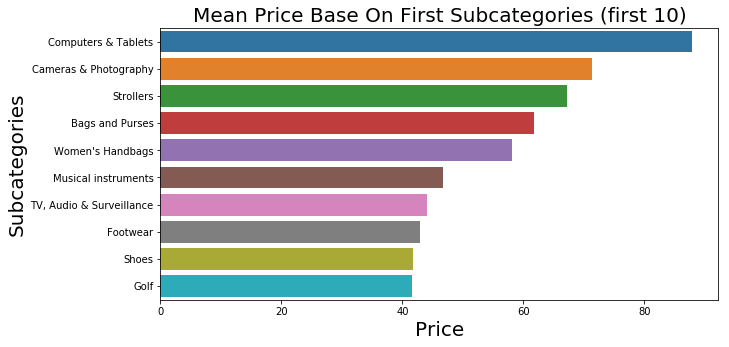

In [32]:
mean_subcat1_price = pd.DataFrame(train.groupby(["subcat1"]).price.mean())
mean_subcat1_price = mean_subcat1_price.sort_values(by = "price", ascending = False)[:10]
mean_subcat1_price.reset_index(level = 0, inplace = True)

plt.figure(figsize = (10, 5))
sns.barplot(x = "price", y = "subcat1", data = mean_subcat1_price, orient = "h")
plt.title("Mean Price Base On First Subcategories (first 10)", fontsize = 20)
plt.ylabel("Subcategories", fontsize = 20)
plt.xlabel("Price", fontsize = 20)
plt.show()

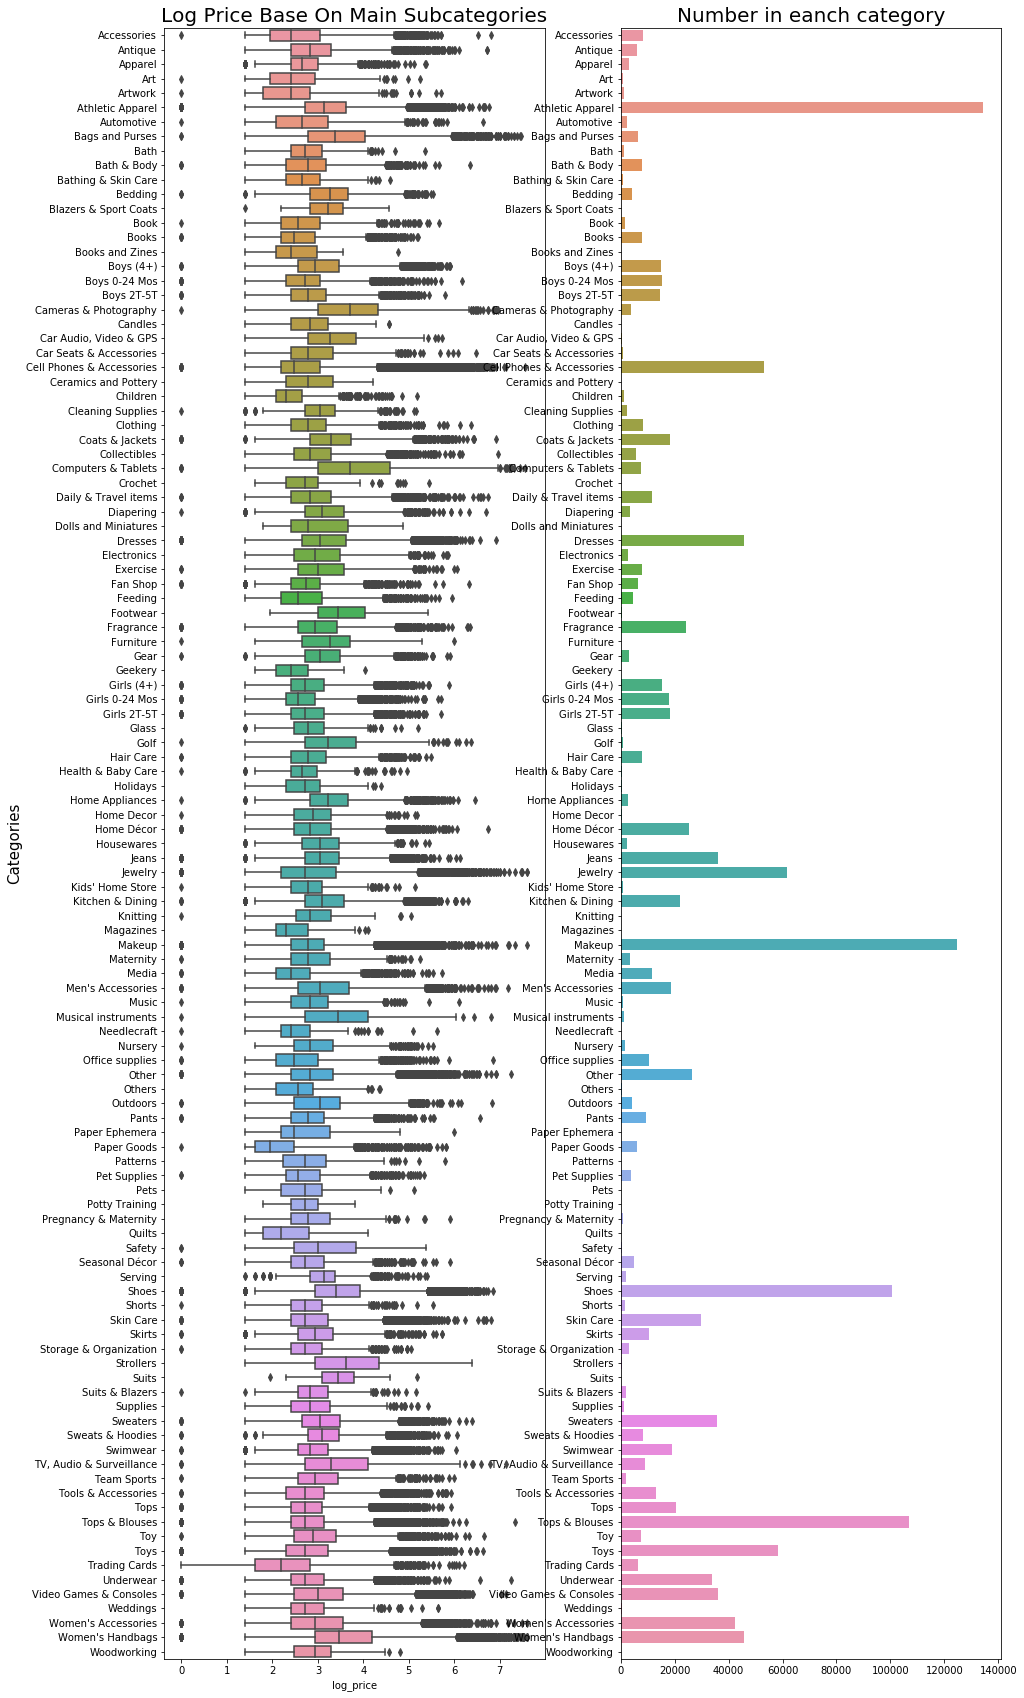

In [33]:
sub_category1 = train.subcat1
order = sorted(sub_category1.unique())
fig, ax = plt.subplots(1, 2, figsize = (15, 30))
sns.boxplot(x = train.log_price, y = sub_category1, orient = "h", order = order, ax = ax[0])
ax[0].set_title("Log Price Base On Main Subcategories", fontsize = 20)
ax[0].set_ylabel("Categories", fontsize = 15)
sns.barplot(sub_category1.value_counts().values, sub_category1.value_counts().index, order = order, ax = ax[1])
ax[1].set_title("Number in eanch category", fontsize = 20)
plt.show()

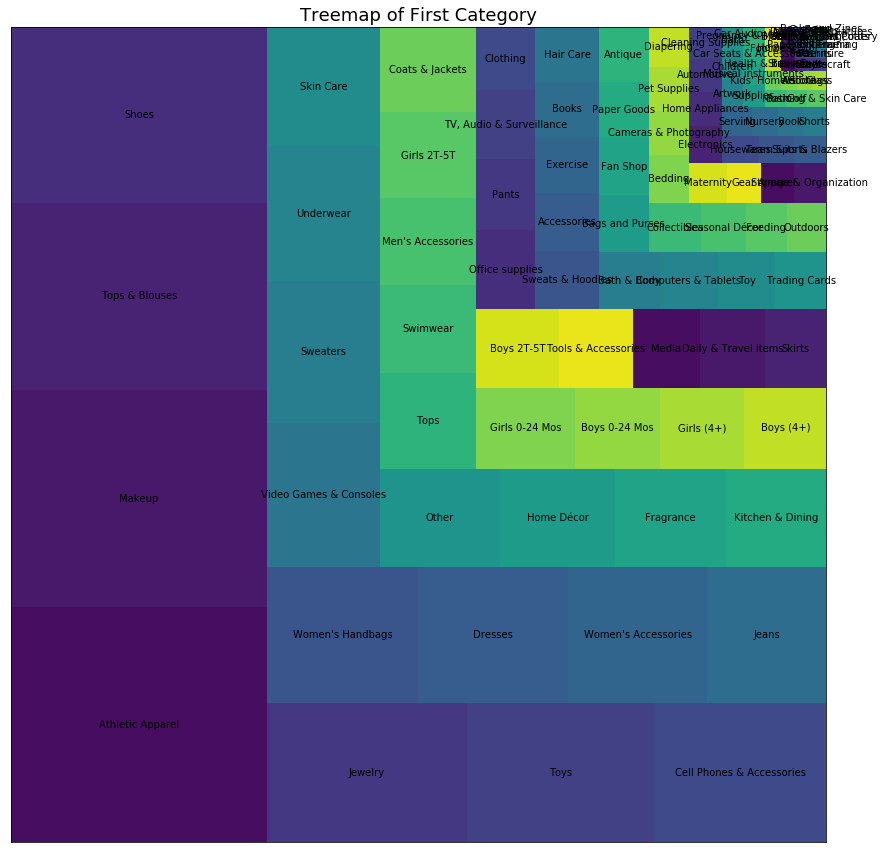

In [34]:
fig = plt.figure(figsize = (15, 10))
regions = train.subcat1.value_counts().to_frame()
ax = fig.add_subplot(111, aspect = "equal")
ax = squarify.plot(sizes = regions["subcat1"].values, label = regions.index,
              color = sns.color_palette("viridis", 30), alpha = 1)
ax.set_xticks([])
ax.set_yticks([])
fig = plt.gcf()
fig.set_size_inches(20, 15)
plt.title("Treemap of First Category", fontsize = 18)
plt.show()

In [35]:
print("There are", len(train.subcat2.unique()), "second categories.")

There are 870 second categories.


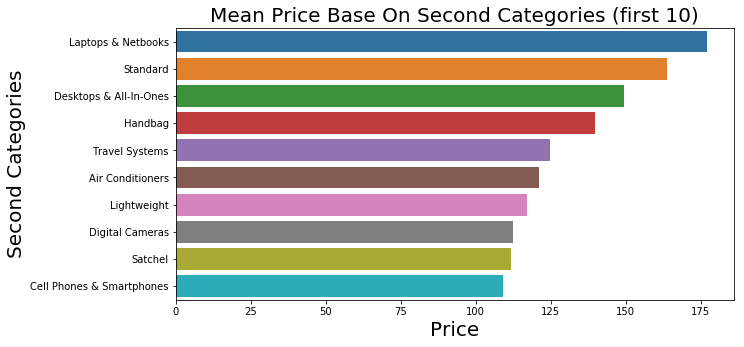

In [36]:
mean_subcat2_price = pd.DataFrame(train.groupby(["subcat2"]).price.mean())
mean_subcat2_price = mean_subcat2_price.sort_values(by = "price", ascending = False)[:10]
mean_subcat2_price.reset_index(level = 0, inplace = True)

plt.figure(figsize = (10, 5))
sns.barplot(x = "price", y = "subcat2", data = mean_subcat2_price, orient = "h")
plt.title("Mean Price Base On Second Categories (first 10)", fontsize = 20)
plt.ylabel("Second Categories", fontsize = 20)
plt.xlabel("Price", fontsize = 20)
plt.show()

In [37]:
def nol(data, m = 2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

# outliers
def ol(data, m = 3):
    return data[(data - np.mean(data)) >= m * np.std(data)]

In [38]:
chist = train.groupby(["category_name"], as_index = False).count().sort_values(by = "train_id",
                                                                               ascending = False)[0:25]

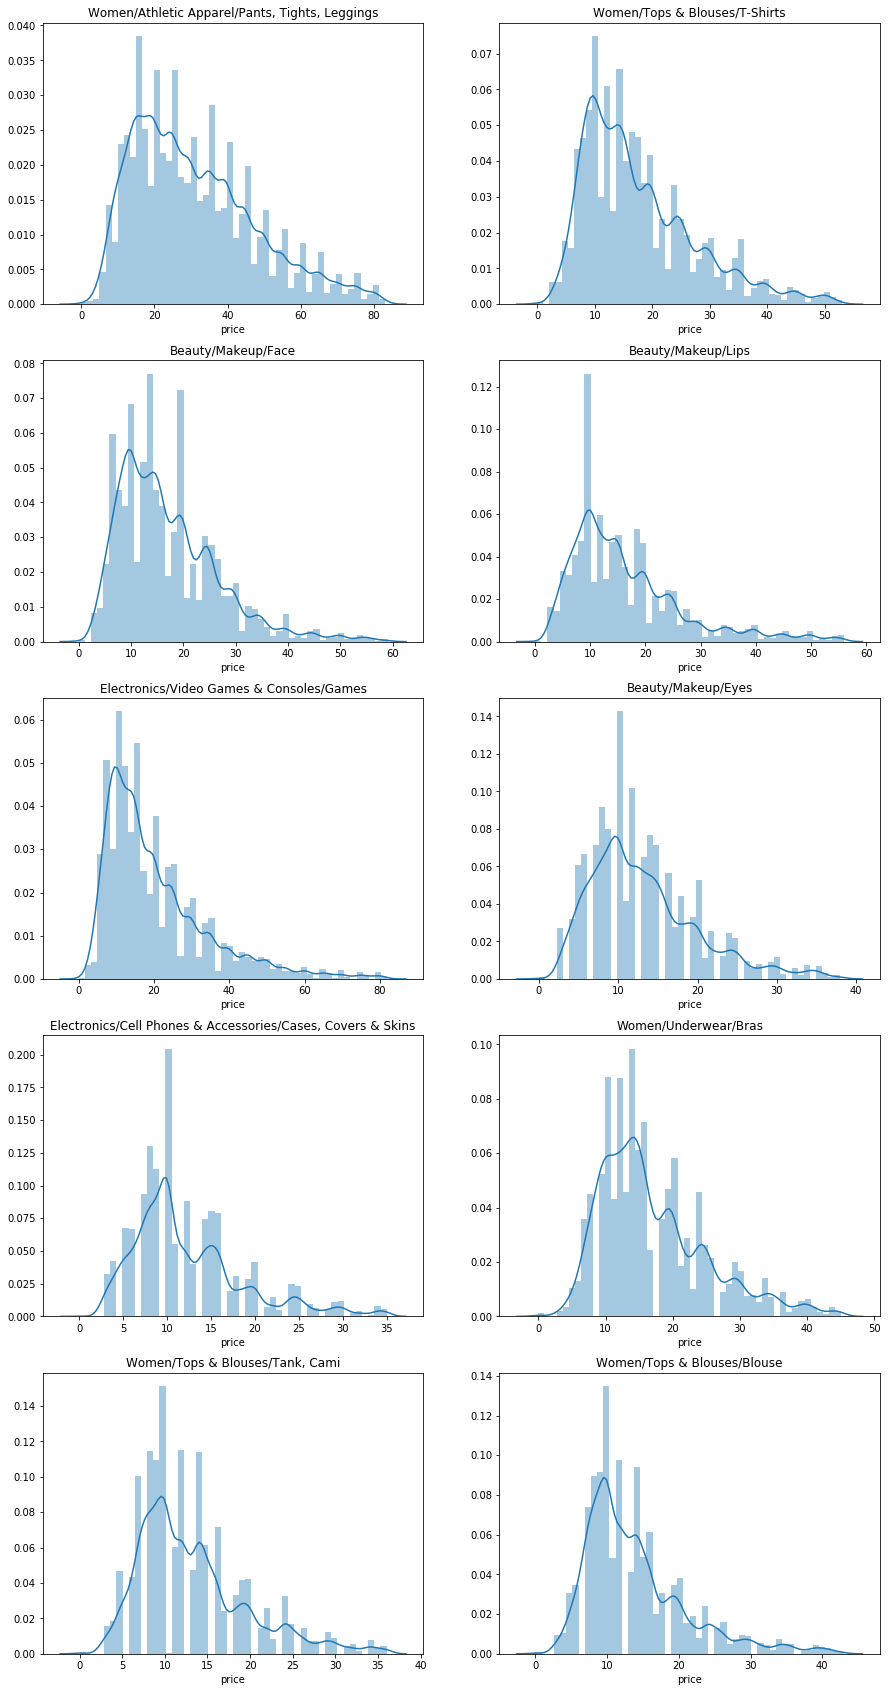

In [39]:
k = 10
fig, ax = plt.subplots(5, 2, figsize = (15, 30))
for i in range(k):
    sns.distplot(nol(train[train["category_name"] == chist["category_name"].values[i]].price), ax = ax[int(i/2)][i%2])
    ax[int(i/2)][i%2].set_title(chist["category_name"].values[i])

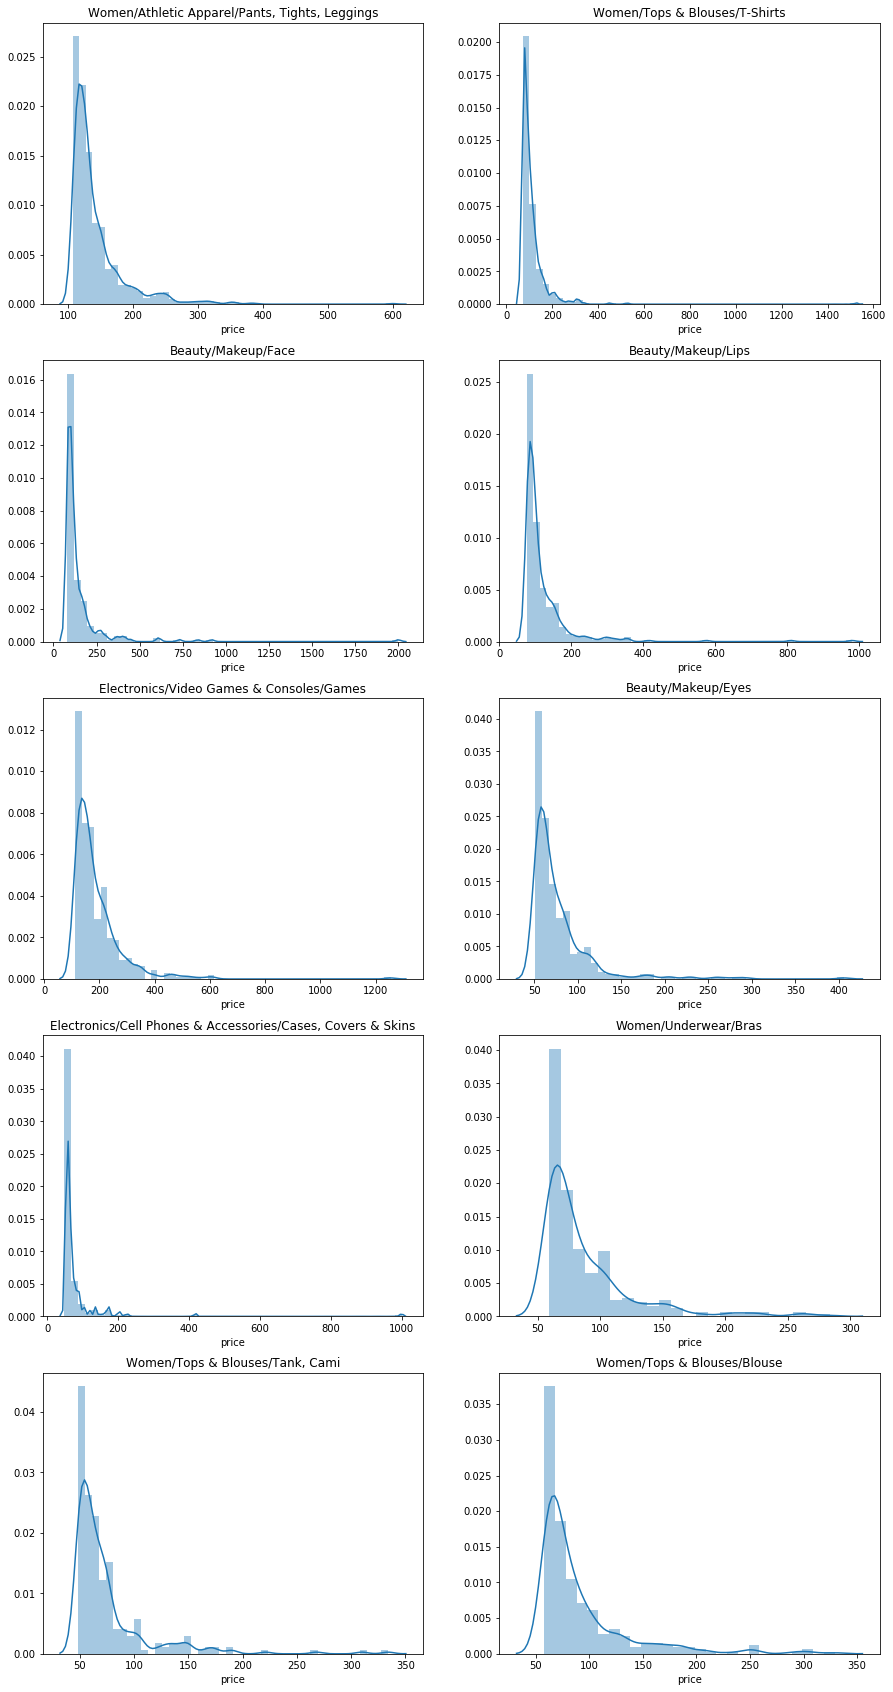

In [40]:
fig,ax = plt.subplots(5, 2, figsize = (15, 30))
for i in range(k):
    sns.distplot(ol(train[train["category_name"] == chist["category_name"].values[i]].price), ax = ax[int(i/2)][i%2])
    ax[int(i/2)][i%2].set_title(chist["category_name"].values[i])

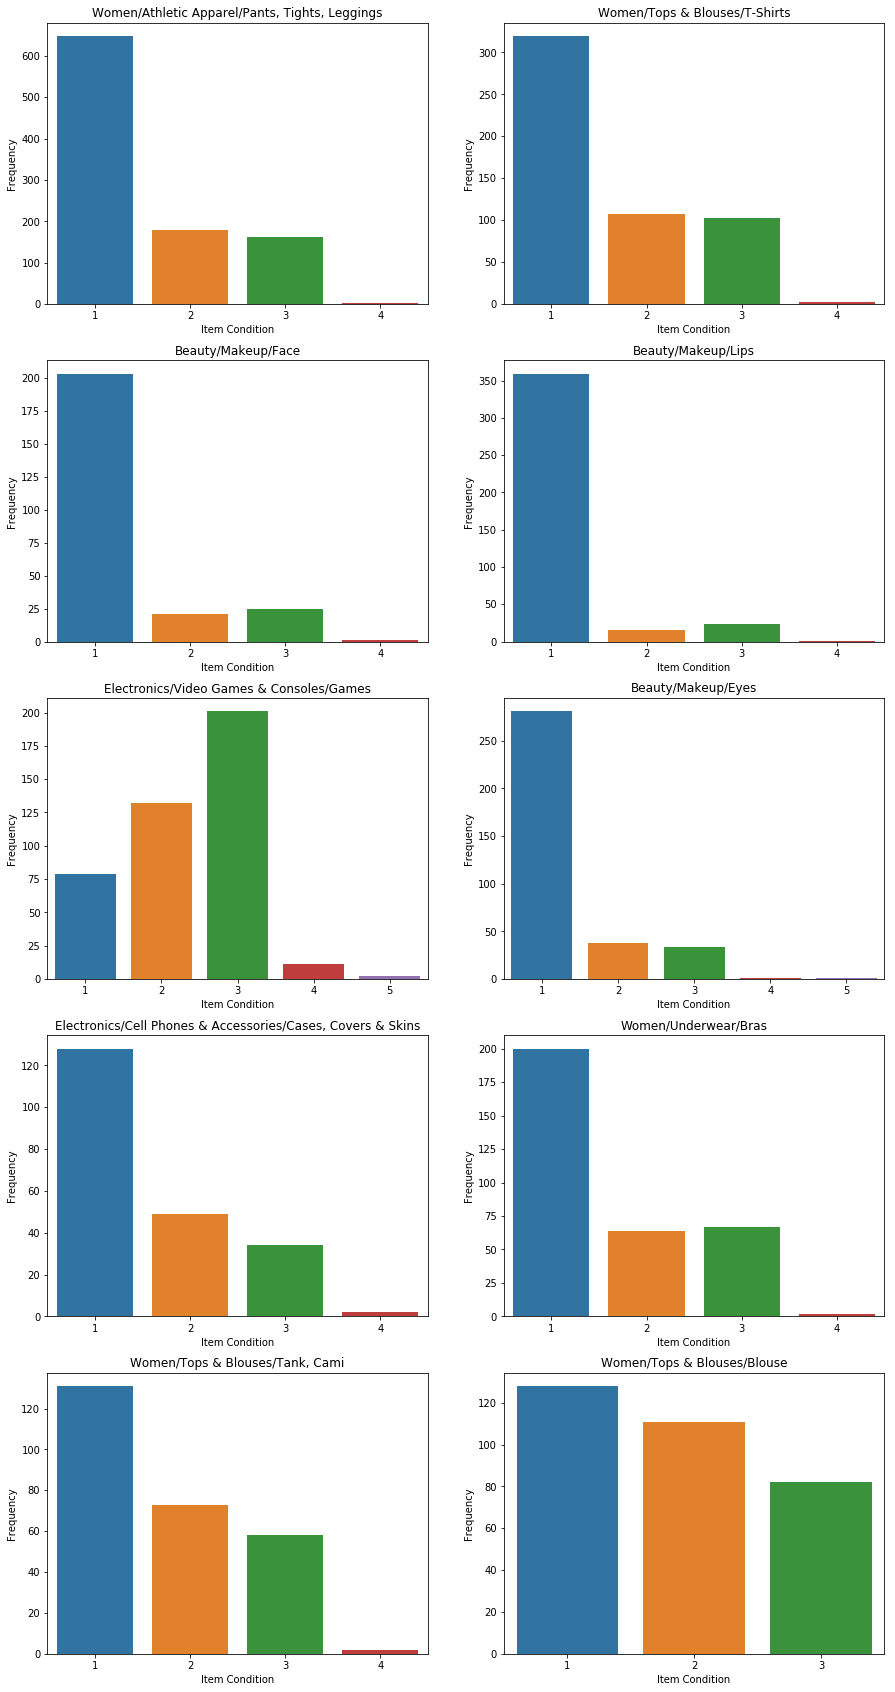

In [41]:
fig, ax = plt.subplots(5, 2, figsize = (15, 30))
for i in range(k):    
    ohist = train.iloc[(ol(train[
        train["category_name"] == chist["category_name"].values[i]
    ].price).index).values].groupby(["item_condition_id"], as_index = False).count()
    sns.barplot(x = ohist["item_condition_id"], y = ohist["train_id"], ax = ax[int(i/2)][i%2])
    ax[int(i/2)][i%2].set_title(chist["category_name"].values[i])
    ax[int(i/2)][i%2].set_xlabel("Item Condition")
    ax[int(i/2)][i%2].set_ylabel("Frequency")

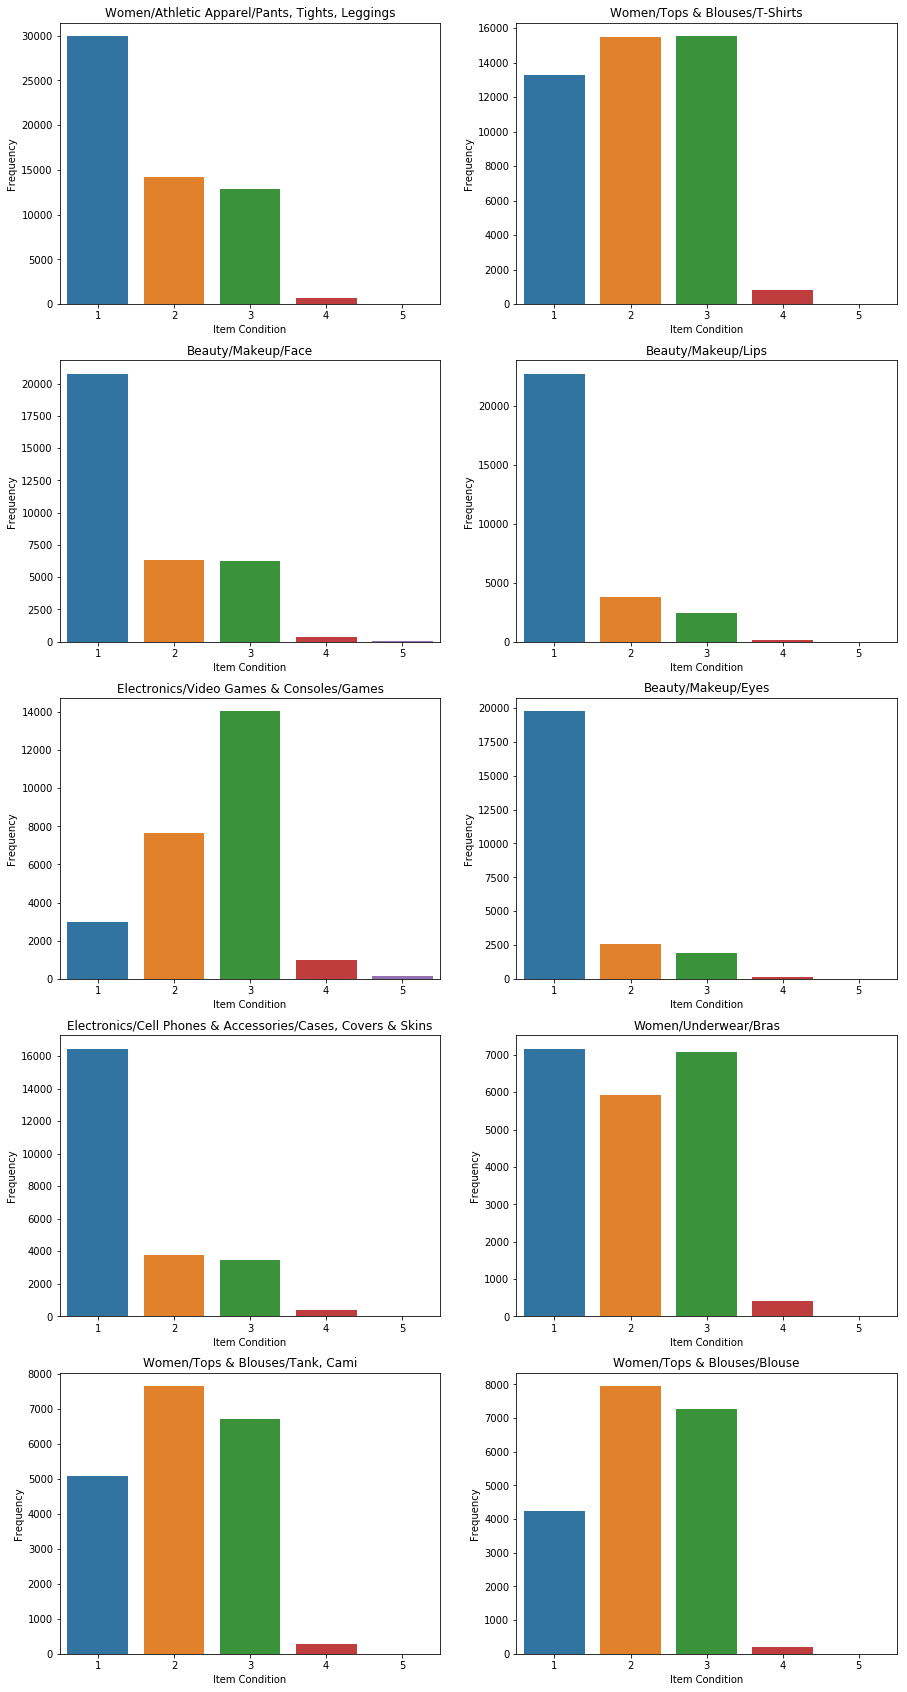

In [42]:
fig, ax = plt.subplots(5, 2, figsize = (15, 30))
for i in range(k):    
    nohist = train.iloc[(nol(train[
        train["category_name"] == chist["category_name"].values[i]
    ].price).index).values].groupby(["item_condition_id"], as_index = False).count()
    sns.barplot(x = nohist["item_condition_id"], y = nohist["train_id"], ax = ax[int(i/2)][i%2])
    ax[int(i/2)][i%2].set_title(chist["category_name"].values[i])
    ax[int(i/2)][i%2].set_xlabel("Item Condition")
    ax[int(i/2)][i%2].set_ylabel("Frequency")

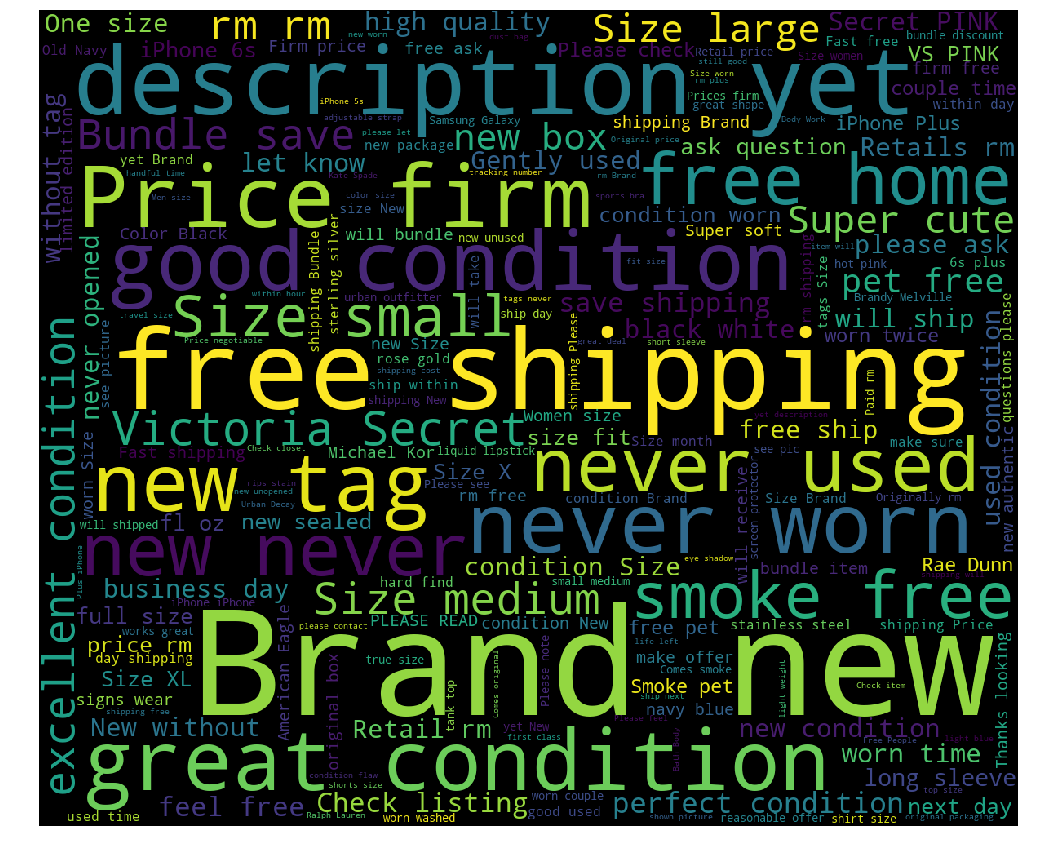

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 1200, height = 1000).generate(" ".join(train.item_description.astype(str)))
plt.figure(figsize = (20, 15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
ncat = ["Women", "Beauty", "Kids", "Electronics", "Men", "Home", 
        "Other", "Vintage & Collectibles", "Handmade","Sports & Outdoors"]

fig, ax = plt.subplots(5, 2, figsize = (40, 40))
for i in range(len(ncat)):
    c = ncat[i]
    wordcloud = WordCloud(max_words = 200
                         ).generate(" ".join(train["item_description"][train["main_cat"] == c].astype(str)))
    ax[int(i/2)][i%2].axis("off")
    ax[int(i/2)][i%2].imshow(wordcloud)
    ax[int(i/2)][i%2].set_title(c, fontsize = 35)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import string 

def compute_tfidf(description):
    description = str(description)
    description.translate(string.punctuation)

    tfidf_sum = 0
    words_count = 0
    for w in description.lower().split():
        words_count += 1
        if w in tfidf_dict:
            tfidf_sum += tfidf_dict[w]
    
    if words_count > 0:
        return tfidf_sum/words_count
    else:
        return 0
    
tfidf = TfidfVectorizer(
    min_df = 5, strip_accents = "unicode", lowercase = True,
    analyzer = "word", token_pattern = r"\w+", ngram_range =(1, 3), use_idf = True, 
    smooth_idf = True, sublinear_tf = True, stop_words = "english")

tfidf.fit_transform(train["item_description"].apply(str))
tfidf_dict = dict(zip(tfidf.get_feature_names(), tfidf.idf_))
train["desc_tfidf"] = train["item_description"].apply(compute_tfidf)

In [ ]:
plt.figure(figsize = (15, 10))
plt.scatter(x = train.desc_tfidf, y = train.price, alpha = 0.5)
plt.xlabel("TF-IDF")
plt.ylabel("Price")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(np.hstack([train.name]))
train["name"] = le.transform(train.name)
le.fit(np.hstack([train.brand_name]))
train["brand_name"] = le.transform(train.brand_name)
le.fit(np.hstack([train.main_cat]))
train["main_cat"] = le.transform(train.main_cat)
le.fit(np.hstack([train.subcat1]))
train["subcat1"] = le.transform(train.subcat1)
le.fit(np.hstack([train.subcat2]))
train["subcat2"] = le.transform(train.subcat2)

In [ ]:
columns = list(train.columns)
plt.figure(figsize = (10, 10))
sns.heatmap(train[columns].corr(), annot = True, linewidth = 0.5)
plt.show()

In [ ]:
train.info()